In [2]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import cv2
from scipy import ndimage

In [3]:
all_npz = glob('data_with_centers/*.npz')
# print(all_npz)

alldata = []
for file in all_npz:
    with np.load(file) as data:
        alldata.append({'old_filename': data['old_filename'], 'biosensor': data['biosensor'], 'mask': data['mask'], 'cell_centers': data['cell_centers']})

alldata.sort(key=lambda x: x['old_filename'])

In [77]:
# Iterpolálás mellet az indexeket is le kell skálázni majd hozzáadni a megfeleő pixeleket a maszkhoz
def uniform_mask(mask_size, mask, centers):
        interpolated_mask = torch.nn.functional.interpolate(mask.unsqueeze(0).unsqueeze(0).float(), size=(mask_size, mask_size), mode='nearest').squeeze(0).squeeze(0).byte()
        
        x_scale = mask.shape[0] / mask_size
        y_scale = mask.shape[1] / mask_size
        # print(x_scale, y_scale)
        
        scaled_centers = centers / [x_scale, y_scale]

        # Add the cell centers to the mask
        indices = np.transpose(scaled_centers.astype(int))
        interpolated_mask[indices[0], indices[1]] = 255

        return interpolated_mask


49.9 52.625


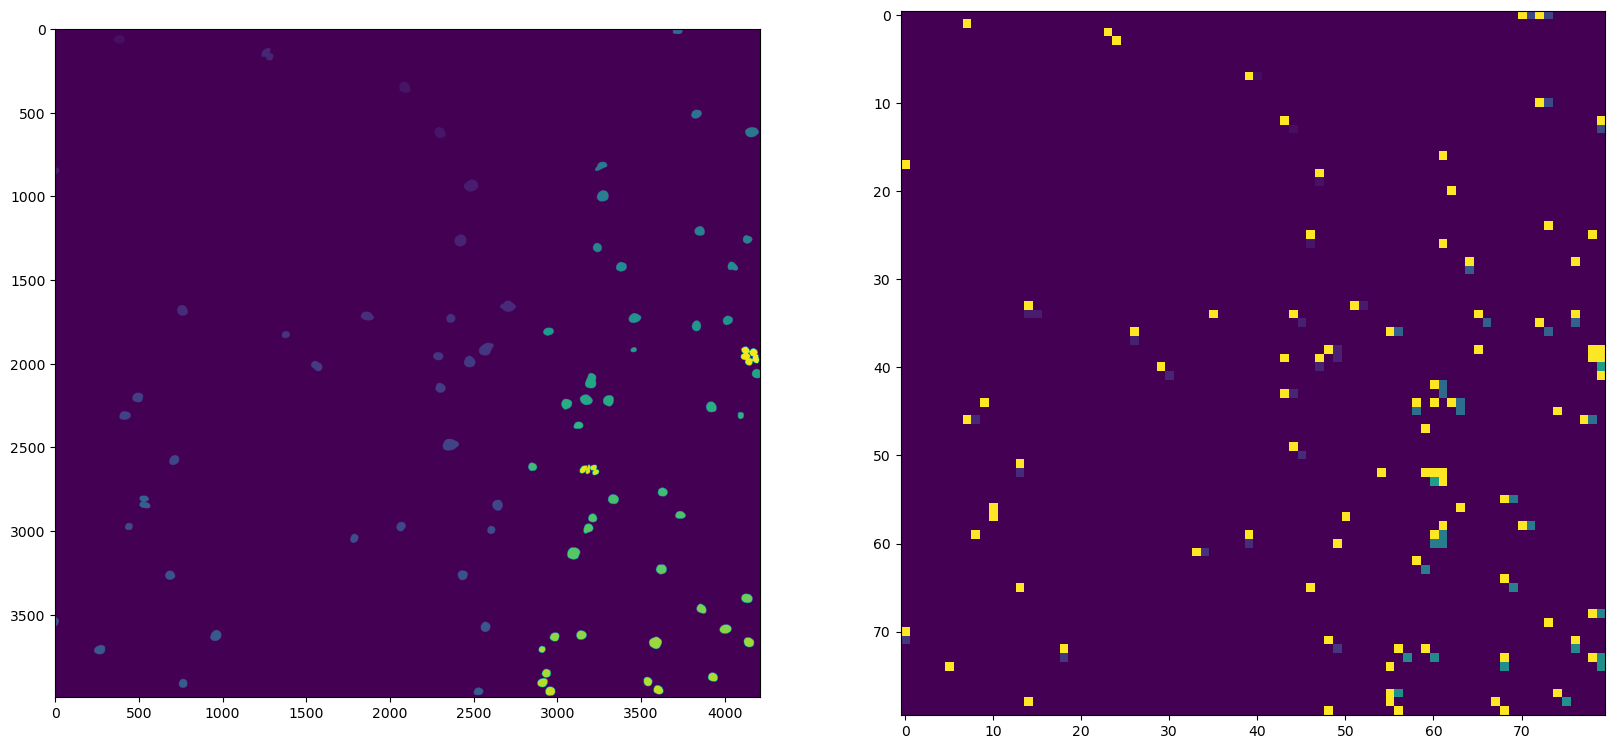

In [79]:
# 22, 38, 78, 101, 103, 106, 108, 109, 110, 112, 113, 117, 119, 121, 123, 138, 143, 145

test = alldata[123]
test_mask = test['mask'].astype(np.uint8)
test_centers = test['cell_centers']
test_mask_tensor = torch.from_numpy(test_mask)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the test_mask
axs[0].imshow(test_mask)

# Interpolated mask
axs[1].imshow(uniform_mask(80, test_mask_tensor, test_centers))


plt.show()

In [ ]:
#  Nem négyzet maszokok keresése
# 22, 38, 78, 101, 103, 106, 108, 109, 110, 112, 113, 117, 119, 121, 123,  138, 143, 145
for index, data in enumerate(alldata):
    print(index)
    uniform_mask(80, torch.from_numpy(data['mask'].astype(np.uint8)), data['cell_centers'])